In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline


In [17]:
towntax = pd.read_csv("cumltowntaxincome.csv")

In [18]:
towntax = towntax.replace('*', np.NaN)
towntax = towntax.replace(' ', np.NaN)
towntax = towntax.replace('* ', np.NaN)

In [19]:
colname = ['Return','Exempt','MarJnt','Single','MarSep','HdHous','AGI','FedTI','VTI','NetVTax']

for x in colname:
    towntax[x] = pd.to_numeric(towntax[x])

In [20]:
towntax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14058 entries, 0 to 14057
Data columns (total 13 columns):
Year       14058 non-null int64
Town       14058 non-null object
AGIClss    14058 non-null object
Return     13735 non-null float64
Exempt     13735 non-null float64
MarJnt     13735 non-null float64
Single     13735 non-null float64
MarSep     13735 non-null float64
HdHous     13735 non-null float64
AGI        13735 non-null float64
FedTI      13735 non-null float64
VTI        13735 non-null float64
NetVTax    13735 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
pd.unique(towntax['AGIClss'])

array(['Loss or None', '0.01 - 4999', '5000 - 9999', '10000 - 14999',
       '15000 - 19999', '20000 - 24999', '25000 - 29999', '30000 - 34999',
       '35000 - 39999', '40000 - 44999', '45000 - 49999', '50000 - 59999',
       '60000 - 74999', '75000 - 99999', '100000 - 149999', '150000 +',
       '0.01 - 9999', '10000 - 19999', '20000 - 29999', '30000 - 39999',
       '40000 - 49999', '50000 - 74999', '75000 +'], dtype=object)

In [6]:
class1filter = '10000 - 19999'
class1df = towntax[(towntax['AGIClss'] == class1filter)]
class1df

class2filter = '75000 +'
class2df = towntax[(towntax['AGIClss'] == class2filter)]
class2df

,Year,Town,AGIClss,Return,Exempt,MarJnt,Single,MarSep,HdHous,AGI,FedTI,VTI,NetVTax
55,2005,Andover,75000 +,40.0,88.0,33.0,6.0,1.0,0.0,5651456.0,4217609.0,3896276.0,1.939836e+05
79,2005,Athens,75000 +,11.0,25.0,9.0,2.0,0.0,0.0,1186396.0,864218.0,810889.0,2.800665e+04
108,2005,Baltimore,75000 +,13.0,40.0,12.0,1.0,0.0,0.0,1195190.0,885061.0,879506.0,4.140000e+04
196,2005,Belvidere,75000 +,12.0,30.0,10.0,2.0,0.0,0.0,2030104.0,1602326.0,1217097.0,7.352600e+04
284,2005,Bloomfield,75000 +,4.0,9.0,3.0,1.0,0.0,0.0,365757.0,294558.0,290758.0,1.450300e+04
452,2005,Brookline,75000 +,31.0,86.0,27.0,4.0,0.0,0.0,4013678.0,3147317.0,2886389.0,1.399620e+05
475,2005,Brunswick,75000 +,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,2005,Buel's Gore,75000 +,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,2005,East Haven,75000 +,8.0,20.0,8.0,0.0,0.0,0.0,708998.0,538123.0,522114.0,2.329100e+04
960,2005,Elmore,75000 +,93.0,267.0,81.0,12.0,0.0,0.0,13130553.0,10378902.0,9842961.0,5.519906e+05


In [7]:
town1sum = class1df[['Town','Return', 'NetVTax']].groupby('Town', as_index=False).sum()
town1sum = town1sum[town1sum['Return'].notnull()]
town1sum['Net Tax per Return'] =  town1sum['NetVTax'] / town1sum['Return']
town1sum = town1sum.sort_values(by='Net Tax per Return',ascending=0)
town1sum

,Town,Return,NetVTax,Net Tax per Return
78,Winhall,77.0,13804.5697,179.280126
60,Underhill ID,99.0,17276.3392,174.508477
39,Peru,132.0,22463.9770,170.181644
56,Stratton,108.0,17669.3191,163.604806
44,Ripton,171.0,27912.4159,163.230502
11,Elmore,90.0,14519.8466,161.331629
5,Belvidere,113.0,17435.5422,154.296834
76,Whiting,177.0,27178.3860,153.550203
61,Vershire,230.0,34451.2159,149.787895
28,Landgrove,38.0,5604.0000,147.473684


In [8]:
town2sum = class2df[['Town','Return', 'NetVTax']].groupby('Town', as_index=False).sum()
town2sum = town2sum[town2sum['Return'].notnull()]
town2sum['Net Tax per Return'] =  town2sum['NetVTax'] / town2sum['Return']
town2sum = town2sum.sort_values(by='Net Tax per Return',ascending=0)
town2sum

,Town,Return,NetVTax,Net Tax per Return
23,Hubbardton,193.0,2.504041e+06,12974.304509
77,Winhall,217.0,2.582105e+06,11899.099088
28,Landgrove,114.0,1.290481e+06,11320.006113
44,Ripton,260.0,2.921731e+06,11237.428441
46,Rupert,211.0,1.964111e+06,9308.585262
40,Pittsfield,174.0,1.590894e+06,9143.071333
73,Weston,308.0,2.545897e+06,8265.900199
33,Morgan,195.0,1.591360e+06,8160.820898
56,Stratton,143.0,9.662775e+05,6757.185355
58,Suppressed,128.0,8.414721e+05,6574.000591


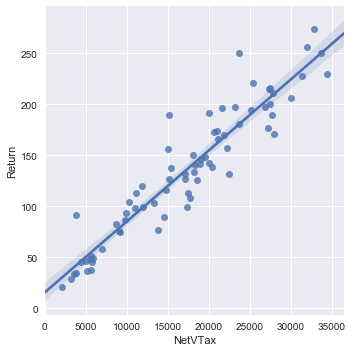

In [9]:
sns.lmplot(x='NetVTax', y='Return', data=town1sum)

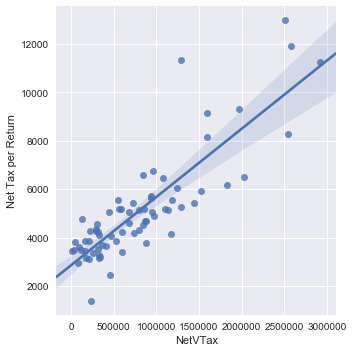

In [10]:
sns.lmplot(x='NetVTax', y='Net Tax per Return', data=town2sum)

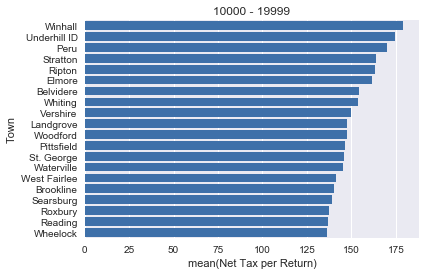

In [11]:
data = town1sum[0:20]
sns.barplot(x='Net Tax per Return', y='Town', data=data, color=sns.xkcd_rgb["medium blue"])
plt.title(class1filter)
plt.show()

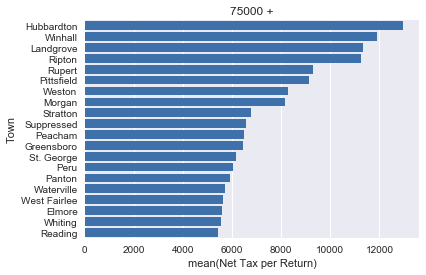

In [12]:
data = town2sum[0:20]
sns.barplot(x='Net Tax per Return', y='Town', data=data, color=sns.xkcd_rgb["medium blue"])
plt.title(class2filter)
plt.show()

In [13]:
townfilter = "Granby"
onetown = towntax[(towntax['Town'] == townfilter)]
onetown.head(20)

,Year,Town,AGIClss,Return,Exempt,MarJnt,Single,MarSep,HdHous,AGI,FedTI,VTI,NetVTax
1194,2005,Granby,Loss or None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,2005,Granby,0.01 - 9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,2005,Granby,10000 - 19999,5.0,8.0,2.0,1.0,1.0,1.0,76950.0,21930.0,21930.0,790.000
1197,2005,Granby,20000 - 29999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198,2005,Granby,30000 - 39999,4.0,11.0,4.0,0.0,0.0,0.0,144453.0,68253.0,68253.0,2459.000
1199,2005,Granby,40000 - 49999,4.0,14.0,4.0,0.0,0.0,0.0,179978.0,79784.0,77834.0,2802.000
1200,2005,Granby,50000 - 74999,7.0,19.0,7.0,0.0,0.0,0.0,424831.0,303738.0,303738.0,9911.407
1201,2005,Granby,75000 +,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4683,2006,Granby,0.01 - 9999,5.0,4.0,1.0,3.0,0.0,1.0,25999.0,3667.0,3667.0,131.000
4684,2006,Granby,10000 - 19999,5.0,7.0,2.0,3.0,0.0,0.0,62700.0,12346.0,12346.0,445.000


In [14]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
  }
});

<IPython.core.display.Javascript object>

In [15]:
display logic:

from IPython.display import Javascript
#runs arbitrary javascript, client-side
Javascript("""
           window.vizObj={};
           """.format(df.to_json()))

SyntaxError: invalid syntax (<ipython-input-15-c39c4e4a465b>, line 1)

In [ ]:
https://blog.thedataincubator.com/2015/08/embedding-d3-in-an-ipython-notebook/

In [ ]:
import plotly
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF 

import time

plotly.tools.set_credentials_file(username='kefortney', api_key='7Q0XBiuPx1FdvssIZaCh')

In [ ]:
pd.unique(towntax['Year'])

In [ ]:
dataset = towntax[(towntax['AGIClss'] == 'Loss or None') | (towntax['AGIClss'] == '0.01 - 9999') | 
                  (towntax['AGIClss'] == '10000 - 19999') | (towntax['AGIClss'] == '20000 - 29999')]
dataset = dataset[(dataset['Year'] == 2005)]
years_from_col = set(dataset['Year'])
years_ints = sorted(list(years_from_col))
years = [str(year) for year in years_ints]


# make list of counties
towns = []
for town in dataset['Town']:
    if town not in towns: 
        towns.append(town)

        

In [ ]:
dataset.shape

In [ ]:
columns = []

# make grid
for year in years:
    for town in towns:
        dataset_by_year = dataset[dataset['Year'] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[dataset_by_year['Town'] == town]
        for col_name in dataset_by_year_and_cont:
            # each column name is unique
            column_name = '{year}_{town}_{header}_gapminder_grid'.format(
                year=year, town=town, header=col_name)
            a_column = Column(list(dataset_by_year_and_cont[col_name]), column_name)
            columns.append(a_column)

# upload grid
grid = Grid(columns)
url = py.grid_ops.upload(grid, 'gapminder_grid'+str(time.time()), auto_open=False)
url

In [ ]:
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [30, 85], 'title': 'GEOID', 'gridcolor': '#FFFFFF'}
figure['layout']['yaxis'] = {'title': 'Population', 'type': 'log', 'gridcolor': '#FFFFFF'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['plot_bgcolor'] = 'rgb(223, 232, 243)'

In [ ]:
figure['layout']['sliders'] = {'active': 0,'yanchor': 'top','xanchor': 'left',
                 'currentvalue': {'font': {'size': 20},
                                  'prefix': 'text-before-value-on-display','visible': True,'xanchor': 'right'},
                 'transition': {'duration': 300, 'easing': 'cubic-in-out'}, 'pad': {'b': 10, 't': 50}, 
                 'len': 0.9, 'x': 0.1, 'y': 0,
                 'steps': [...]}

In [ ]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [ ]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

custom_colors = {
    'Essex': 'rgb(171, 99, 250)',
    'Franklin': 'rgb(171, 99, 250)',
    'Grand Isle': 'rgb(230, 99, 250)',
    'Orleans': 'rgb(171, 99, 250)',
    'Washington': 'rgb(230, 99, 250)',
    'Lamoille': 'rgb(171, 99, 250)',
    'Caledonia': 'rgb(99, 110, 250)',
    'Chittenden': 'rgb(171, 99, 250)',
    'Addison': 'rgb(25, 211, 243)',
    'Orange': 'rgb(171, 99, 250)',
    'Windsor': 'rgb(99, 110, 250)',
    'Rutland': 'rgb(25, 211, 243)',
    'Bennington': 'rgb(171, 99, 250)',
    'Windham': 'rgb(50, 170, 255)'
}

In [ ]:
custom_colors = {
    'Addison': 'rgb(171, 99, 250)', 
    'Albany': 'rgb(171, 99, 250)', 
    'Alburg': 'rgb(171, 99, 250)', 
    'Andover': 'rgb(171, 99, 250)', 
    'Arlington': 'rgb(171, 99, 250)', 
    'Athens': 'rgb(171, 99, 250)',
    'Averill': 'rgb(171, 99, 250)', 
    "Avery's Gore": 'rgb(171, 99, 250)',
    'Bakersfield', 
    'Baltimore', 
    'Barnard',
    'Barnet', 
    'Barre City', 
    'Barre Town', 
    'Barton', 
    'Belvidere',
    'Bennington', 
    'Benson', 
    'Berkshire', 
    'Berlin', 
    'Bethel',
    'Bloomfield', 
    'Bolton', 
    'Bradford', 'Braintree', 'Brandon',
       'Brattleboro', 'Bridgewater', 'Bridport', 'Brighton', 'Bristol',
       'Brookfield', 'Brookline', 'Brownington', 'Brunswick',
       "Buel's Gore", 'Burke', 'Burlington', 'Cabot', 'Calais',
       'Cambridge', 'Canaan', 'Castleton', 'Cavendish', 'Charleston',
       'Charlotte', 'Chelsea', 'Chester', 'Chittenden', 'Clarendon',
       'Colchester', 'Concord', 'Corinth', 'Cornwall', 'Coventry',
       'Craftsbury', 'Danby', 'Danville', 'Derby', 'Dorset', 'Dover',
       'Dummerston', 'Duxbury', 'East Haven', 'East Montpelier', 'Eden',
       'Elmore', 'Enosburg', 'Essex Junction', 'Essex Town', 'Fair Haven',
       'Fairfax', 'Fairfield', 'Fairlee', 'Fayston', 'Ferdinand',
       'Ferrisburgh', 'Fletcher', 'Franklin', 'Georgia', 'Glastenbury',
       'Glover', 'Goshen', 'Grafton', 'Granby', 'Grand Isle', 'Granville',
       'Groton', 'Guildhall', 'Guilford', 'Halifax', 'Hancock', 'Hardwick',
       'Hartford', 'Hartland', 'Highgate', 'Hinesburg', 'Holland',
       'Hubbardton', 'Huntington', 'Hyde Park', 'Ira', 'Irasburg',
       'Isle La Motte', 'Jamaica', 'Jay', 'Jericho', 'Jericho ID',
       'Johnson', 'Killington', 'Kirby', 'Landgrove', 'Leicester',
       'Lemington', 'Lincoln', 'Londonderry', 'Lowell', 'Ludlow',
       'Lunenburg', 'Lyndon', 'Maidstone', 'Manchester', 'Marlboro',
       'Marshfield', 'Mendon', 'Middlebury', 'Middlesex',
       'Middletown Springs', 'Milton', 'Monkton', 'Montgomery',
       'Montpelier', 'Moretown', 'Morgan', 'Morristown', 'Mt. Holly',
       'Mt. Tabor', 'N. Bennington ID', 'New Haven', 'Newark', 'Newbury',
       'Newfane', 'Newport City', 'Newport Town', 'North Hero',
       'Northfield', 'Norton', 'Norwich', 'Orange', 'Orleans', 'Orwell',
       'Panton', 'Pawlet', 'Peacham', 'Peru', 'Pittsfield', 'Pittsford',
       'Plainfield', 'Plymouth', 'Pomfret', 'Poultney', 'Pownal',
       'Proctor', 'Putney', 'Randolph', 'Reading', 'Readsboro', 'Richford',
       'Richmond', 'Ripton', 'Rochester', 'Rockingham', 'Roxbury',
       'Royalton', 'Rupert', 'Rutland City', 'Rutland Town', 'Ryegate',
       'Salisbury', 'Sandgate', 'Searsburg', 'Shaftbury ID', 'Shaftsbury',
       'Sharon', 'Sheffield', 'Shelburne', 'Sheldon', 'Shoreham',
       'Shrewsbury', 'Somerset', 'South Burlington', 'South Hero',
       'Springfield', 'St. Albans City', 'St. Albans Town', 'St. George',
       'St. Johnsbury', 'Stamford', 'Stannard', 'Starksboro',
       'Stockbridge', 'Stowe', 'Strafford', 'Stratton', 'Sudbury',
       'Sunderland', 'Sutton', 'Swanton', 'Thetford', 'Tinmouth',
       'Topsham', 'Townshend', 'Troy', 'Tunbridge', 'Underhill ID',
       'Underhill Town', 'Vergennes', 'Vernon', 'Vershire', 'Victory',
       'Waitsfield', 'Walden', 'Wallingford', 'Waltham', "Warner's Grant",
       "Warren's Gore", 'Warren', 'Washington', 'Waterbury', 'Waterford',
       'Waterville', 'Weathersfield', 'Wells', 'Wells River',
       'West Fairlee', 'West Haven', 'West Rutland', 'West Windsor',
       'Westfield', 'Westford', 'Westminster', 'Westmore', 'Weston',
       'Weybridge', 'Wheelock', 'Whiting', 'Whitingham', 'Williamstown',
       'Williston', 'Wilmington', 'Windham', 'Windsor', 'Winhall',
       'Winooski', 'Wolcott', 'Woodbury', 'Woodford', 'Woodstock',

In [ ]:
col_name_template = '{year}_{town}_{header}_gapminder_grid'
year = 1791
for county in counties:
    data_dict = {
        'xsrc': grid.get_column_reference(col_name_template.format(
            year=year, town=town, header='Population'
        )),
        'ysrc': grid.get_column_reference(col_name_template.format(
            year=year, town=town, header='GEOID'
        )),
        'mode': 'markers',
        'textsrc': grid.get_column_reference(col_name_template.format(
            year=year, town=town, header='County'
        )),
        'marker': {
            'sizemode': 'area',
            'sizeref': 200000,
            'sizesrc': grid.get_column_reference(col_name_template.format(
                 year=year, county=county, header='Population'
            )),
            'color': custom_colors[town]
        },
        'name': town
    }
    figure['data'].append(data_dict)

In [ ]:
for year in years:
    frame = {'data': [], 'name': str(year)}
    for county in counties:
        data_dict = {
            'xsrc': grid.get_column_reference(col_name_template.format(
                year=year, town=town, header='Population'
            )),
            'ysrc': grid.get_column_reference(col_name_template.format(
                year=year, town=town, header='GEOID'
            )),
            'mode': 'markers',
            'textsrc': grid.get_column_reference(col_name_template.format(
                year=year, town=town, header='County'
                )),
            'marker': {
                'sizemode': 'area',
                'sizeref': 200000,
                'sizesrc': grid.get_column_reference(col_name_template.format(
                    year=year, town=town, header='Population'
                )),
                'color': custom_colors[town]
            },
            'name': town
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

py.icreate_animations(figure, 'gapminder_example'+str(time.time()))
